In [33]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from graphviz import Source
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('2024_diff_dataset.csv')
df.head()

,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Average DO [mg/L),Average TAN [mg/L],Amount of Sugar added (sucrose) g,Average KH [dkH],Average alkalinity [mg/L],Amount of buffer added (g),...,Average Secchi Depth (cm),Concentration of feed solution (g/L),Volume of feed solution left over / unused (L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Actual feed rate given [g/L],Artemia weight [g/l],target
0,1.0,2.85,0.20,2.0,0.400,NaN,NaN,NaN,NaN,NaN,...,16.0,7.0,0.0,-3.70,0.0,-42.0,NaN,0.03,0.20,0
1,2.0,0.15,-0.17,0.5,-0.125,-0.125,NaN,-0.55,-9.845,8.5,...,-14.0,-1.0,0.0,-0.20,0.0,11.5,-8.0,0.05,0.07,0
2,3.0,0.05,0.11,-1.0,-0.025,0.500,-7.30,2.85,51.015,25.0,...,0.0,4.0,0.0,-0.10,0.0,6.9,-6.0,0.00,0.11,0
3,4.0,0.15,-0.01,0.5,-0.150,2.000,17.05,0.15,2.685,-25.0,...,-2.0,4.0,0.0,0.15,0.0,4.6,-9.0,0.03,0.16,0
4,5.0,-0.30,0.03,0.0,-0.300,1.000,-15.75,1.75,31.325,0.0,...,2.5,-2.0,0.0,0.35,0.0,0.0,-5.0,0.02,0.13,0


In [3]:
for col in df.columns[1:-2]:
    df[col] = df[col].fillna(df[col].median())

In [4]:
df.head()

,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Average DO [mg/L),Average TAN [mg/L],Amount of Sugar added (sucrose) g,Average KH [dkH],Average alkalinity [mg/L],Amount of buffer added (g),...,Average Secchi Depth (cm),Concentration of feed solution (g/L),Volume of feed solution left over / unused (L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Actual feed rate given [g/L],Artemia weight [g/l],target
0,1.0,2.85,0.20,2.0,0.400,0.000,3.75,-0.30,-5.370,0.0,...,16.0,7.0,0.0,-3.70,0.0,-42.0,-1.0,0.03,0.20,0
1,2.0,0.15,-0.17,0.5,-0.125,-0.125,3.75,-0.55,-9.845,8.5,...,-14.0,-1.0,0.0,-0.20,0.0,11.5,-8.0,0.05,0.07,0
2,3.0,0.05,0.11,-1.0,-0.025,0.500,-7.30,2.85,51.015,25.0,...,0.0,4.0,0.0,-0.10,0.0,6.9,-6.0,0.00,0.11,0
3,4.0,0.15,-0.01,0.5,-0.150,2.000,17.05,0.15,2.685,-25.0,...,-2.0,4.0,0.0,0.15,0.0,4.6,-9.0,0.03,0.16,0
4,5.0,-0.30,0.03,0.0,-0.300,1.000,-15.75,1.75,31.325,0.0,...,2.5,-2.0,0.0,0.35,0.0,0.0,-5.0,0.02,0.13,0


In [5]:
len(df)

61

LR: 0.581905 (0.263799)
LDA: 0.581667 (0.224649)
KNN: 0.596270 (0.269721)
DT: 0.606032 (0.255825)
NB: 0.747857 (0.218133)
SVM: 0.510714 (0.244639)
RF: 0.545000 (0.264160)


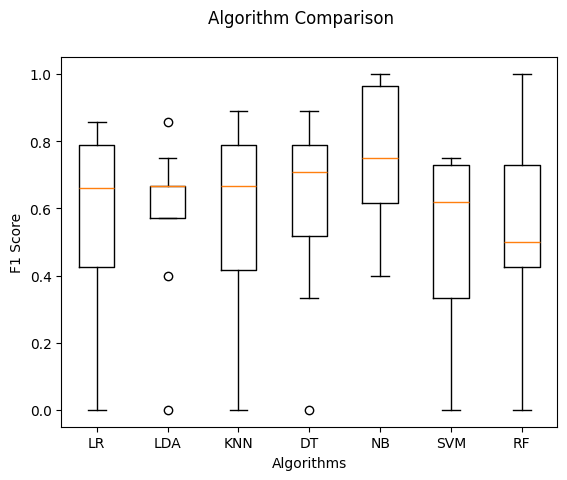

In [6]:
x, y = df.iloc[:, 1:-2], df.target

# prepare configuration for cross validation test harness
seed = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed)
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_artemia_weight_f1_median_20pc_2024.png')
plt.show()

LR: 0.446667 (0.264659)
LDA: 0.451111 (0.286796)
KNN: 0.490278 (0.303572)
DT: 0.443333 (0.201170)
NB: 0.760556 (0.189581)
SVM: 0.427222 (0.313901)
RF: 0.499444 (0.328412)


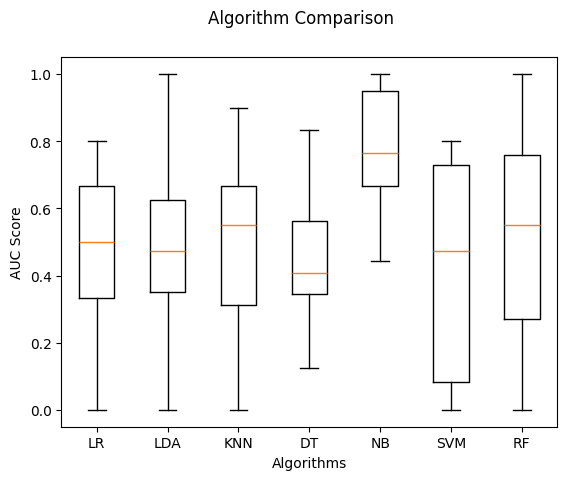

In [7]:
x, y = df.iloc[:, 1:-2], df.target

# prepare configuration for cross validation test harness
seed = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed)
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('AUC Score')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_artemia_weight_auc_median_20pc_2024.png')
plt.show()

# Need to do some feature engineering here

In [8]:
models[-1][1].fit(x, y)

RandomForestClassifier()

In [9]:
dic = dict(feature = [], importance = [])
for k, v in zip(models[-1][1].feature_names_in_, models[-1][1].feature_importances_): 
    dic['feature'] += [k]
    dic['importance'] += [v]
    
df_imps = pd.DataFrame.from_dict(dic)
df_imps.sort_values(ascending=False, by='importance', inplace=True)
df_imps

,feature,importance
3,Average DO [mg/L),0.156066
0,Temperature [C],0.117276
10,Average Secchi Depth (cm),0.087400
1,pH [-],0.082496
11,Concentration of feed solution (g/L),0.060067
16,Actual feed ration given (% BW),0.059084
17,Actual feed rate given [g/L],0.057384
2,Salinity [ppt],0.054639
7,Average alkalinity [mg/L],0.053692
6,Average KH [dkH],0.050018


# Take top features and use those

# See if we need to normalise

Temperature [C]


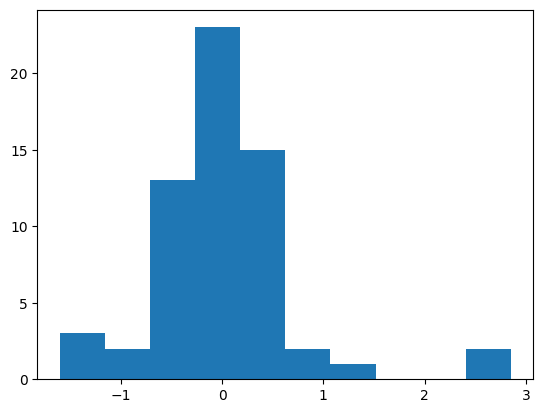

pH [-]


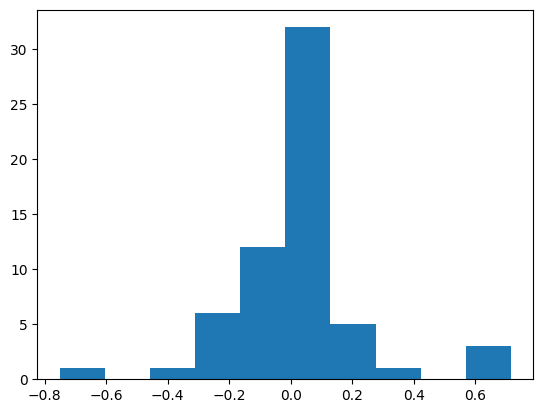

Salinity [ppt]


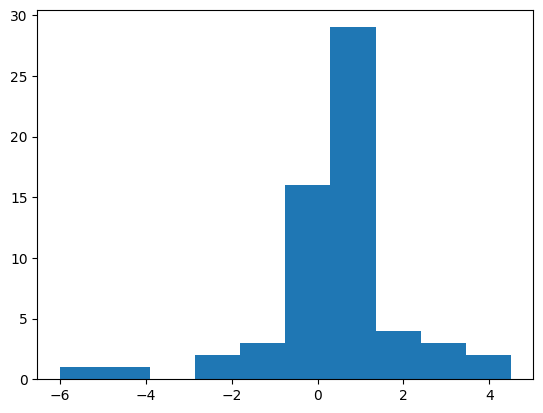

Average DO [mg/L)


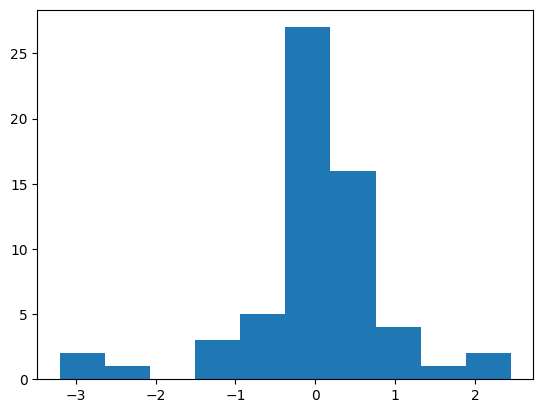

Average TAN [mg/L]


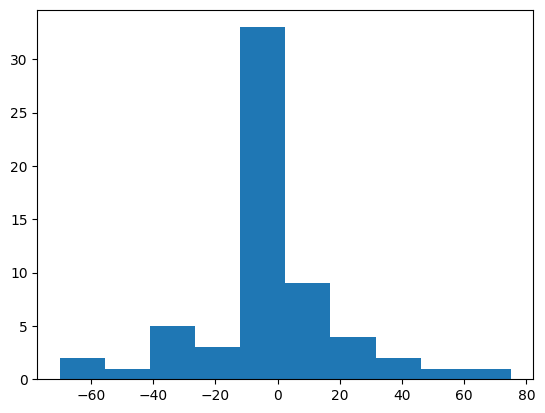

Amount of Sugar added (sucrose) g 


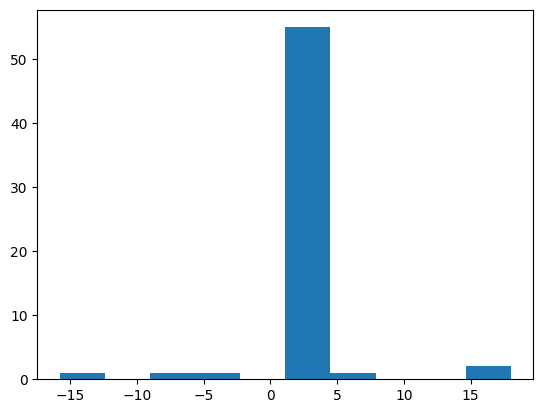

Average KH [dkH]


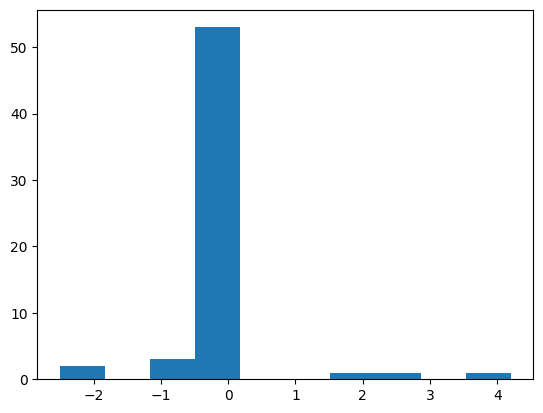

Average alkalinity [mg/L]


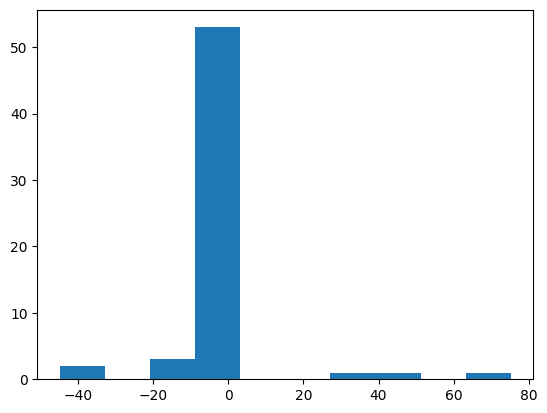

Amount of buffer added (g) 


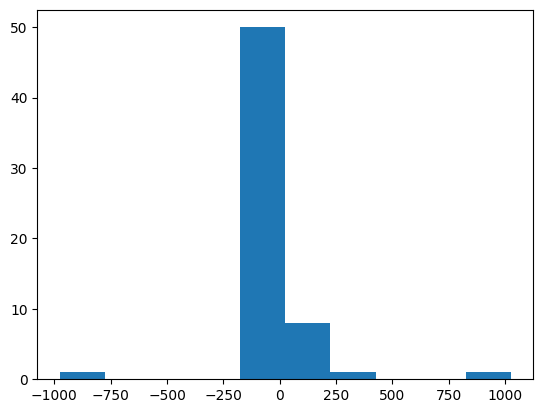

Water change [%]


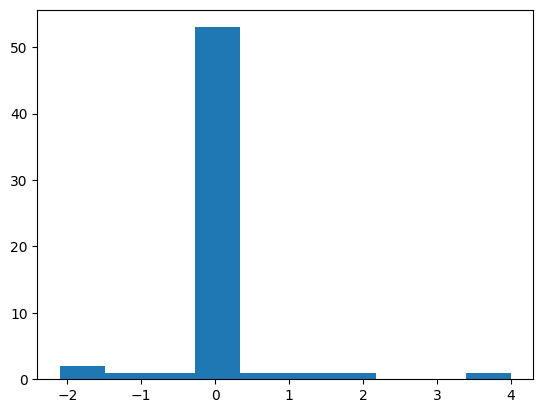

Average Secchi Depth (cm)


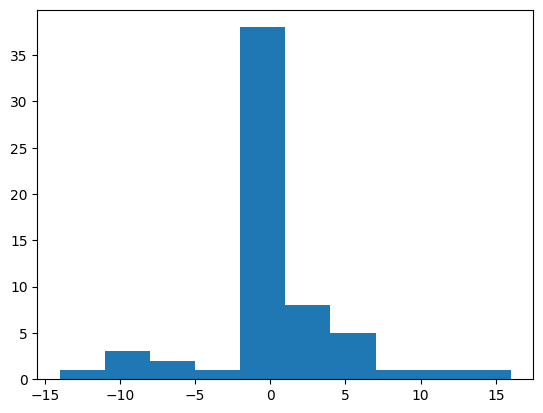

Concentration of feed solution (g/L)


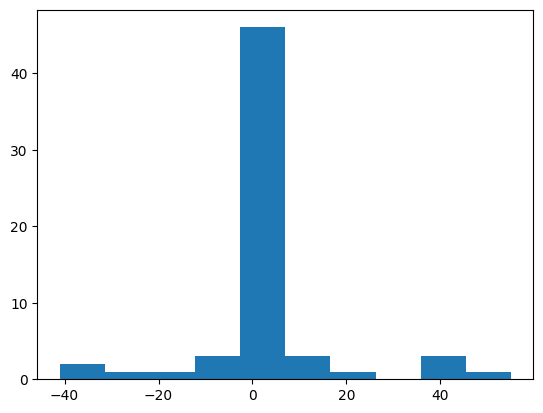

Volume of feed solution left over / unused (L)


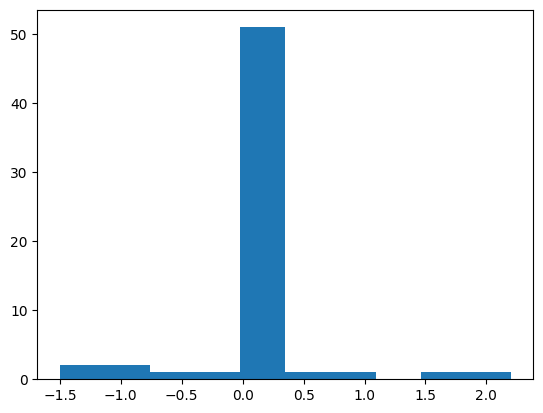

Volume of feed solution given (L)


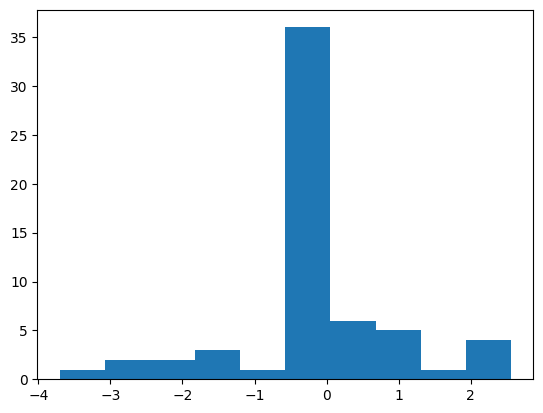

Feed not fed DM (g/day)


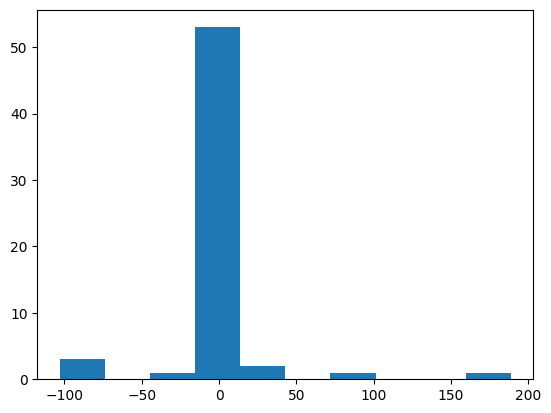

Feed fed DM (g/day)


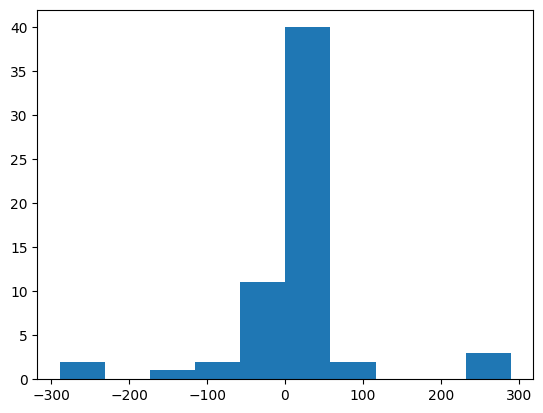

Actual feed ration given (% BW)


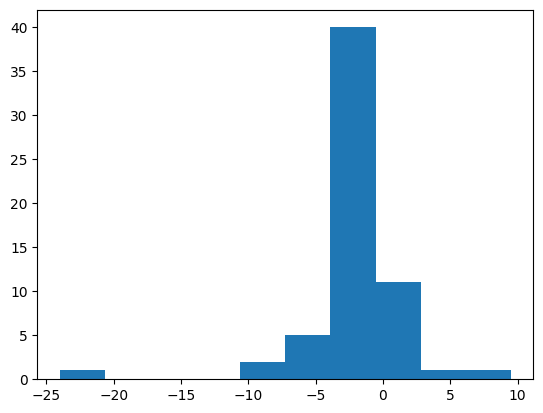

Actual feed rate given [g/L]


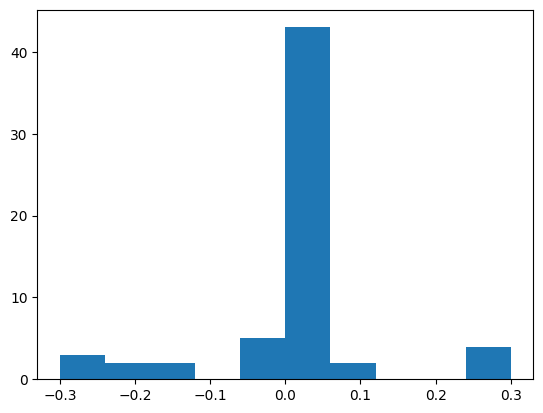

In [10]:
for col in df.columns[1:-2]:
    print(col)
    plt.hist(list(df[col]))
    plt.show()

# Basically Gaussian, can use standard scaler

LR: 0.591905 (0.250259)
LDA: 0.581667 (0.224649)
KNN: 0.654603 (0.189417)
DT: 0.563889 (0.258548)
NB: 0.747857 (0.218133)
SVM: 0.608175 (0.274677)
RF: 0.546667 (0.288367)


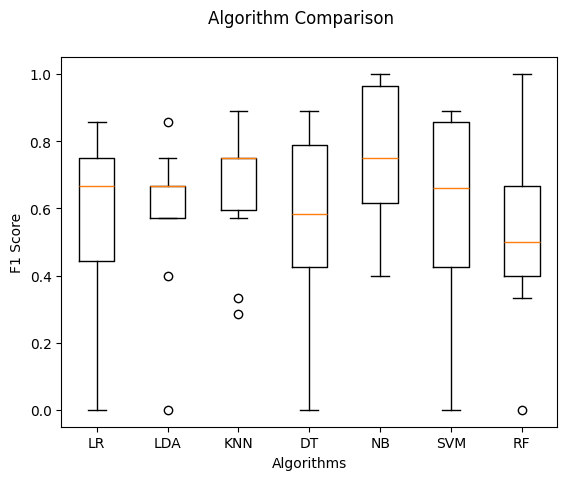

In [11]:
x, y = df.iloc[:, 1:-2], df.target

# prepare configuration for cross validation test harness
seed = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed)
x_scaled = StandardScaler().fit_transform(x_train)
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_artemia_weight_f1_median_20pc_2024_scaled.png')
plt.show()

LR: 0.455000 (0.315176)
LDA: 0.451111 (0.286796)
KNN: 0.505000 (0.222399)
DT: 0.476667 (0.214793)
NB: 0.720278 (0.258056)
SVM: 0.668333 (0.123929)
RF: 0.447222 (0.282573)


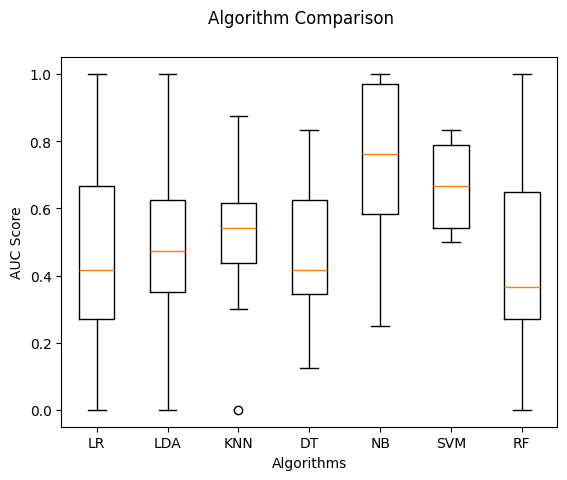

In [12]:
x, y = df.iloc[:, 1:-2], df.target

# prepare configuration for cross validation test harness
seed = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed)
x_scaled = StandardScaler().fit_transform(x_train)
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('AUC Score')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_artemia_weight_auc_median_20pc_2024_scaled.png')
plt.show()

# StandardScaler does not improve, try feature reduction

In [13]:
feats = ['Average DO [mg/L)', 'Temperature [C]', 'pH [-]', 'Average Secchi Depth (cm)', 'Actual feed ration given (% BW)']

In [14]:
df_red = df.loc[:, feats+['target']]
df_red

,Average DO [mg/L),Temperature [C],pH [-],Average Secchi Depth (cm),Actual feed ration given (% BW),target
0,0.400,2.85,0.20,16.0,-1.0,0
1,-0.125,0.15,-0.17,-14.0,-8.0,0
2,-0.025,0.05,0.11,0.0,-6.0,0
3,-0.150,0.15,-0.01,-2.0,-9.0,0
4,-0.300,-0.30,0.03,2.5,-5.0,0
...,...,...,...,...,...,...
56,0.300,0.35,0.70,-2.0,-1.0,1
57,2.450,-0.30,0.29,0.0,-1.0,1
58,-0.550,-0.10,-0.01,-2.0,-1.0,1
59,1.000,0.15,-0.01,2.0,-1.0,1


LR: 0.566190 (0.232842)
LDA: 0.567381 (0.238785)
KNN: 0.589603 (0.196921)
DT: 0.368889 (0.335311)
NB: 0.635635 (0.256318)
SVM: 0.620794 (0.166886)
RF: 0.512937 (0.302517)


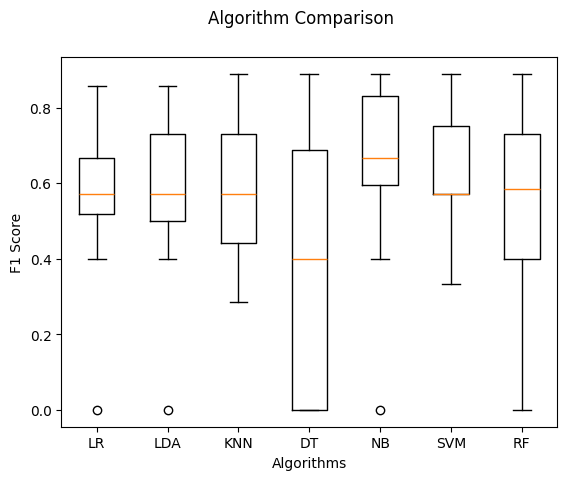

In [15]:
x, y = df_red.iloc[:, :-1], df_red.target
# prepare configuration for cross validation test harness
seed = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed)
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_artemia_weight_f1_median_20pc_2024_scaled_red.png')
plt.show()

LR: 0.513333 (0.317972)
LDA: 0.535556 (0.320139)
KNN: 0.529444 (0.299339)
DT: 0.354167 (0.169446)
NB: 0.702778 (0.251247)
SVM: 0.587778 (0.242655)
RF: 0.437778 (0.314366)


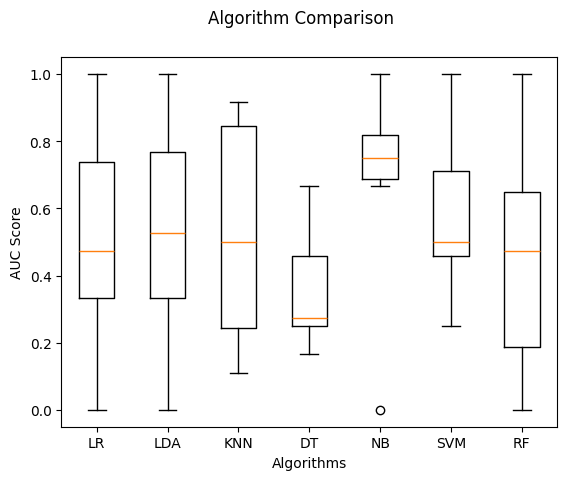

In [16]:
x, y = df_red.iloc[:, :-1], df_red.target

# prepare configuration for cross validation test harness
seed = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed)
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('AUC Score')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_artemia_weight_auc_median_20pc_2024_scaled_red.png')
plt.show()

# Add in features from the list

In [17]:
models

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('DT', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC()),
 ('RF', RandomForestClassifier())]

In [20]:
dt = models[3][1].fit(x_train, y_train)

In [21]:
dt.feature_importances_

array([0.29493303, 0.31270936, 0.14629023, 0.06008276, 0.18598462])

In [22]:
df_red.columns[:-1]

Index(['Average DO [mg/L)', 'Temperature [C]', 'pH [-]',
       'Average Secchi Depth (cm)', 'Actual feed ration given (% BW)'],
      dtype='object')

In [24]:
rf = models[-1][1].fit(x_train, y_train)
rf.feature_importances_

array([0.24705721, 0.21666505, 0.1890377 , 0.16423619, 0.18300384])

In [25]:
nb = models[4][1].fit(x_train, y_train)

In [26]:
from sklearn.inspection import permutation_importance

In [27]:
nb_import = permutation_importance(nb, x, y, random_state=42)

In [28]:
sorted_idx = np.argsort(nb_import.importances_mean)[::-1]
for idx in sorted_idx:
    print(f"Feature {idx}, Importance: {nb_import.importances_mean[idx]}")

Feature 4, Importance: 0.11475409836065578
Feature 2, Importance: 0.02622950819672134
Feature 0, Importance: 0.022950819672131174
Feature 3, Importance: 0.019672131147541006
Feature 1, Importance: 0.019672131147541006


# Get true feature importances

In [29]:
x, y = df.iloc[:, 1:-2], df.target
nb = GaussianNB().fit(x, y)
nb_import = permutation_importance(nb, x, y, random_state=42)

In [30]:
dic = dict(feature = [], importance = [])
for k, v in zip(df.columns[1:-2], nb_import.importances_mean): 
    dic['feature'] += [k]
    dic['importance'] += [v]
    
df_imps = pd.DataFrame.from_dict(dic)
df_imps.sort_values(ascending=False, by='importance', inplace=True)
df_imps

,feature,importance
6,Average KH [dkH],0.052459
7,Average alkalinity [mg/L],0.052459
5,Amount of Sugar added (sucrose) g,0.036066
16,Actual feed ration given (% BW),0.022951
9,Water change [%],0.019672
10,Average Secchi Depth (cm),0.000000
14,Feed not fed DM (g/day),0.000000
13,Volume of feed solution given (L),0.000000
12,Volume of feed solution left over / unused (L),0.000000
11,Concentration of feed solution (g/L),0.000000


In [77]:
x, y = df.iloc[:, 1:-2], df.target
svc = SVC().fit(x, y)
svc_import = permutation_importance(svc, x, y, random_state=42)

In [78]:
dic = dict(feature = [], importance = [])
for k, v in zip(df.columns[1:-2], svc_import.importances_mean): 
    dic['feature'] += [k]
    dic['importance'] += [v]
    
df_imps = pd.DataFrame.from_dict(dic)
df_imps.sort_values(ascending=False, by='importance', inplace=True)
df_imps

,feature,importance
8,Amount of buffer added (g),0.019672
0,Temperature [C],0.000000
10,Average Secchi Depth (cm),0.000000
16,Actual feed ration given (% BW),0.000000
15,Feed fed DM (g/day),0.000000
14,Feed not fed DM (g/day),0.000000
13,Volume of feed solution given (L),0.000000
12,Volume of feed solution left over / unused (L),0.000000
11,Concentration of feed solution (g/L),0.000000
9,Water change [%],0.000000


In [79]:
x, y = df.iloc[:, 1:-2], df.target
lda = LinearDiscriminantAnalysis().fit(x, y)
lda_import = permutation_importance(lda, x, y, random_state=42)

In [80]:
dic = dict(feature = [], importance = [])
for k, v in zip(df.columns[1:-2], lda_import.importances_mean): 
    dic['feature'] += [k]
    dic['importance'] += [v]
    
df_imps = pd.DataFrame.from_dict(dic)
df_imps.sort_values(ascending=False, by='importance', inplace=True)
df_imps

,feature,importance
10,Average Secchi Depth (cm),0.131148
3,Average DO [mg/L),0.068852
16,Actual feed ration given (% BW),0.068852
12,Volume of feed solution left over / unused (L),0.049180
9,Water change [%],0.045902
14,Feed not fed DM (g/day),0.039344
8,Amount of buffer added (g),0.039344
4,Average TAN [mg/L],0.036066
2,Salinity [ppt],0.019672
17,Actual feed rate given [g/L],0.003279


# Cycle through each experiment and get an idea of the importances of each variable in each

In [71]:
feat_cols = ['Day of Experiment', 'Temperature [C]', 'pH [-]', 'Salinity [ppt]', 
             'Average DO [mg/L)', 'Average TAN [mg/L]', 'Amount of Sugar added (sucrose) g ', 'Average NO2- [mg/L]',
             'Average NO3- [mg/L]', 'PO4 3- (mg/L)', 'Average KH [dkH]', 'Average alkalinity [mg/L]',
             'Amount of buffer added (g) ', 'Water change [%]', 'Average Secchi Depth (cm)', 
             'Volume of feed solution prepared (L)', 'Concentration of feed solution (g/L)', 'Total feed prepared (g/d)',
             'Volume of feed solution left over / unused (L)', 'Volume of feed solution given (L)', 
             'Feed not fed DM (g/day)', 'Feed fed DM (g/day)', 'Actual feed ration given (% BW)',
             'Actual feed rate given [g/L]', 'Artemia weight [g/l]']

def imports(path):
    df = pd.read_csv(path, encoding='unicode_escape')
    df_feats = df.loc[:, feat_cols]
    
    feats = {k:[] for k in df_feats.columns}
    for day in df_feats['Day of Experiment'].unique():
        feats['Day of Experiment'] += [day]
        tmp_df = df_feats[df_feats['Day of Experiment'] == day]
        tmp_df = tmp_df.iloc[:, 1:]
        for col in tmp_df.columns:
            try:
                feats[col] += [tmp_df[col].median()]
            except:
                feats[col] += [np.nan]
                #print(f"Didn't work with {col}")
    
    ml_df = pd.DataFrame.from_dict(feats)
    ml_df.sort_values(by='Day of Experiment', inplace = True)
    
    diff_df = ml_df.diff(periods=1)
    diff_df['Day of Experiment'] = ml_df['Day of Experiment']
    diff_df.reset_index(inplace=True, drop=True)
    
    diff_df = diff_df.iloc[1:-1, :]
    diff_df.reset_index(inplace=True, drop=True)
    
    diff_df.drop(inplace=True, columns=['Average NO2- [mg/L]', 'Average NO3- [mg/L]', 'PO4 3- (mg/L)'])
    
    df_final = diff_df.drop(columns=['Volume of feed solution prepared (L)', 'Total feed prepared (g/d)'])
    
    for col in df_final.columns[1:-1]:
        df_final[col] = df_final[col].fillna(df_final[col].median())
        df_final[col] = df_final[col].fillna(0)
    
    df_final['target'] = [0]+[1 if diff_df['Artemia weight [g/l]'][i]<0.8*diff_df['Artemia weight [g/l]'][i] else 0 for i in diff_df.index[1:]]
    
    x, y = df_final.iloc[:, 1:-2], df_final.target
    
    nb_import = permutation_importance(nb, x, y, random_state=42)
    
    dic = dict(feature = [], importance = [])
    for k, v in zip(df_final.columns[1:-2], nb_import.importances_mean): 
        dic['feature'] += [k]
        dic['importance'] += [v]
    
    df_imps = pd.DataFrame.from_dict(dic)
    df_imps.sort_values(ascending=False, by='importance', inplace=True)
    
    return df_imps

In [72]:
directory = "C:/Users/ojjy1/Documents/aquanzo/2024_exps/"
dfs = []
for path in os.listdir(directory):
    if path.endswith('.csv'):
        try:
            dfs.append(imports(directory+path))
        except:
            print(f"Didn't work with {path}")

Didn't work with MU_X102a_D5Fe47___V005..csv
Didn't work with M_X048a_+_X051a_D2Fe41_SR___2XL.csv
Didn't work with M_X075c_DFe43___XSd.csv
Didn't work with M_X079c_DFe43___XSa.csv
Didn't work with M_X079c_DFe43___XSb.csv
Didn't work with M_X079c_DFe43___XSc.csv
Didn't work with M_X079c_DFe43___XSd.csv


In [73]:
dfs

[                                           feature  importance
 0                                  Temperature [C]         0.0
 1                                           pH [-]         0.0
 16                 Actual feed ration given (% BW)         0.0
 15                             Feed fed DM (g/day)         0.0
 14                         Feed not fed DM (g/day)         0.0
 13               Volume of feed solution given (L)         0.0
 12  Volume of feed solution left over / unused (L)         0.0
 11            Concentration of feed solution (g/L)         0.0
 10                       Average Secchi Depth (cm)         0.0
 9                                 Water change [%]         0.0
 8                      Amount of buffer added (g)          0.0
 7                        Average alkalinity [mg/L]         0.0
 6                                 Average KH [dkH]         0.0
 5               Amount of Sugar added (sucrose) g          0.0
 4                               Average

# Same but with mean dataset

In [81]:
df = pd.read_csv('2024_diff_dataset_mean.csv')
df.head()

,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Average DO [mg/L),Average TAN [mg/L],Amount of Sugar added (sucrose) g,Average KH [dkH],Average alkalinity [mg/L],Amount of buffer added (g),...,Average Secchi Depth (cm),Concentration of feed solution (g/L),Volume of feed solution left over / unused (L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Actual feed rate given [g/L],Artemia weight [g/l],target
0,2.0,0.166707,-0.197889,-0.805728,-0.213353,-18.485577,NaN,-0.070000,-1.253000,33.783333,...,-7.552169,-50.242178,-0.241505,0.911542,0.004911,21.767403,-3.545230,0.027974,0.098340,0
1,3.0,-0.013595,0.097795,-1.085973,-0.125369,-0.687217,-7.300,2.380000,42.602000,26.157143,...,-0.656164,2.844918,-0.026624,0.515600,0.473171,7.766976,-23.431205,0.020915,0.101576,0
2,4.0,0.024659,0.012317,0.051431,-0.109132,3.720294,45.925,0.370000,6.623000,-23.957143,...,-0.848101,6.233341,-0.090741,1.193518,-0.001667,28.352197,-10.078408,0.018975,0.202872,0
3,5.0,-0.186475,0.000903,1.002633,-0.166637,0.039510,-39.125,1.536667,27.506333,-16.483333,...,1.354680,0.992566,0.931268,0.081167,4.730238,12.188413,-1.542962,0.031745,0.168498,0
4,6.0,0.101966,-0.030253,1.215576,0.167072,4.353695,-10.750,0.513333,9.188667,64.321429,...,0.749759,0.404483,-0.634027,1.015185,3.634392,7.542676,-13.784013,-0.016077,0.194669,0


In [82]:
for col in df.columns[1:-2]:
    df[col] = df[col].fillna(df[col].mean())

In [83]:
df.head()

,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Average DO [mg/L),Average TAN [mg/L],Amount of Sugar added (sucrose) g,Average KH [dkH],Average alkalinity [mg/L],Amount of buffer added (g),...,Average Secchi Depth (cm),Concentration of feed solution (g/L),Volume of feed solution left over / unused (L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Actual feed rate given [g/L],Artemia weight [g/l],target
0,2.0,0.166707,-0.197889,-0.805728,-0.213353,-18.485577,2.142857,-0.070000,-1.253000,33.783333,...,-7.552169,-50.242178,-0.241505,0.911542,0.004911,21.767403,-3.545230,0.027974,0.098340,0
1,3.0,-0.013595,0.097795,-1.085973,-0.125369,-0.687217,-7.300000,2.380000,42.602000,26.157143,...,-0.656164,2.844918,-0.026624,0.515600,0.473171,7.766976,-23.431205,0.020915,0.101576,0
2,4.0,0.024659,0.012317,0.051431,-0.109132,3.720294,45.925000,0.370000,6.623000,-23.957143,...,-0.848101,6.233341,-0.090741,1.193518,-0.001667,28.352197,-10.078408,0.018975,0.202872,0
3,5.0,-0.186475,0.000903,1.002633,-0.166637,0.039510,-39.125000,1.536667,27.506333,-16.483333,...,1.354680,0.992566,0.931268,0.081167,4.730238,12.188413,-1.542962,0.031745,0.168498,0
4,6.0,0.101966,-0.030253,1.215576,0.167072,4.353695,-10.750000,0.513333,9.188667,64.321429,...,0.749759,0.404483,-0.634027,1.015185,3.634392,7.542676,-13.784013,-0.016077,0.194669,0


In [84]:
len(df)

59

LR: 0.494286 (0.214706)
LDA: 0.518810 (0.224291)
KNN: 0.672576 (0.203254)
DT: 0.521270 (0.281037)
NB: 0.781190 (0.173213)
SVM: 0.705195 (0.182829)
RF: 0.631667 (0.192413)


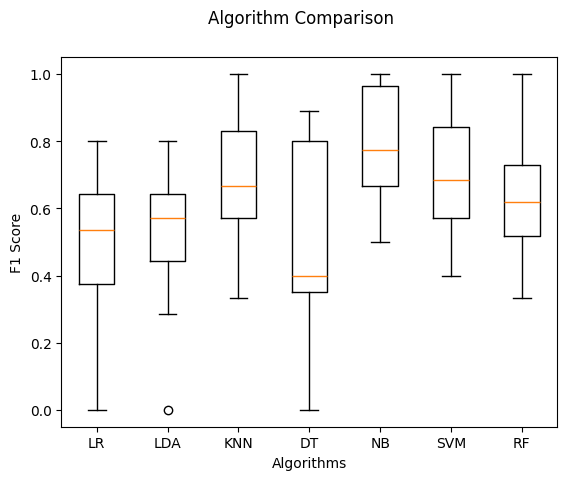

In [85]:
x, y = df.iloc[:, 1:-2], df.target

# prepare configuration for cross validation test harness
seed = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed)
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
ax.set_xticklabels(names)
plt.savefig('algo_comparison_artemia_weight_f1_mean_20pc_2024.png')
plt.show()

In [89]:
x, y = df.iloc[:, 1:-2], df.target
nb = GaussianNB().fit(x, y)
nb_import = permutation_importance(nb, x, y, random_state=42)

In [90]:
dic = dict(feature = [], importance = [])
for k, v in zip(df.columns[1:-2], nb_import.importances_mean): 
    dic['feature'] += [k]
    dic['importance'] += [v]
    
df_imps = pd.DataFrame.from_dict(dic)
df_imps.sort_values(ascending=False, by='importance', inplace=True)
df_imps

,feature,importance
5,Amount of Sugar added (sucrose) g,0.067797
14,Feed not fed DM (g/day),0.064407
16,Actual feed ration given (% BW),0.050847
12,Volume of feed solution left over / unused (L),0.030508
8,Amount of buffer added (g),0.023729
11,Concentration of feed solution (g/L),0.020339
9,Water change [%],0.016949
3,Average DO [mg/L),0.013559
1,pH [-],0.006780
0,Temperature [C],0.006780


In [91]:
df_neg = df[df.target == 1]
df_neg = df_neg.reset_index(drop=True)
df_pos = df[df.target == 0]
df_pos = df_pos.reset_index(drop=True)
def quart(col, df = df_neg):
    quartiles = df[col].quantile([.25, .75])
    iqr = quartiles[.75]-quartiles[.25]
    print(f'{col} IQR = {iqr}')
    quarts = []
    print(f"Q1 = {quartiles[.25]}\nQ3 = {quartiles[.75]}\n")
    for i in range(len(df[col])):
        if (i > iqr-1.5*quartiles[.25]) or (i < iqr+1.5*quartiles[.75]):
            quarts.append(i)
        else:
            continue
    return iqr, quarts

In [101]:
import_feats = ['Actual feed ration given (% BW)', 
                'Concentration of feed solution (g/L)', 'Average DO [mg/L)', 
                'pH [-]', 'Temperature [C]']

In [95]:
iqr_pos, quarts_pos = quart('Artemia weight [g/l]', df_pos)
iqr_neg, quarts_neg = quart('Artemia weight [g/l]', df_neg)

Artemia weight [g/l] IQR = 0.21972256097561002
Q1 = 0.05827743902439
Q3 = 0.278

Artemia weight [g/l] IQR = 0.14875000000000022
Q1 = -0.18500000000000028
Q3 = -0.036250000000000074



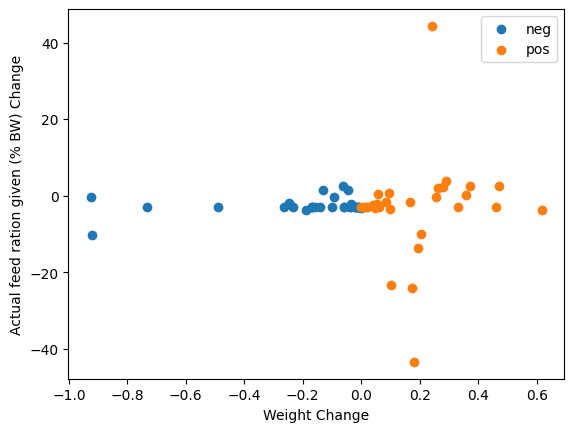

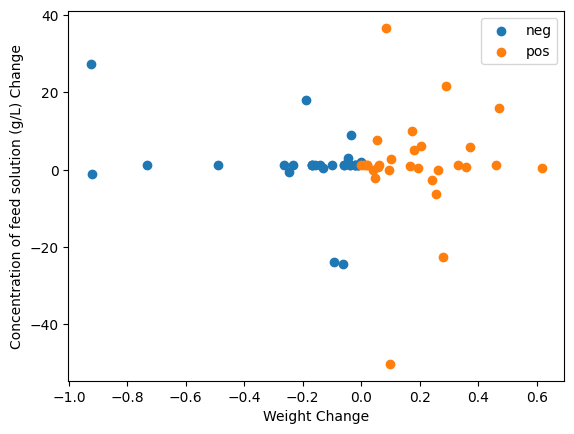

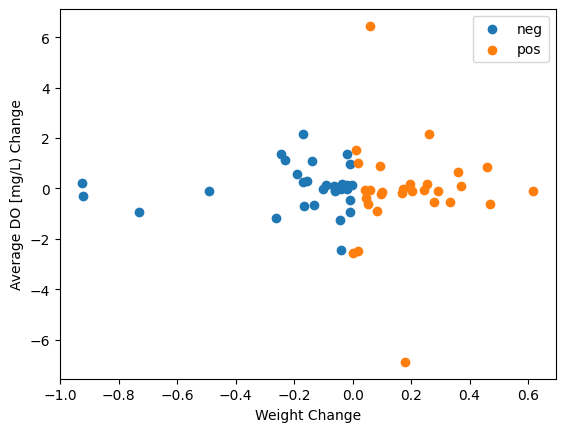

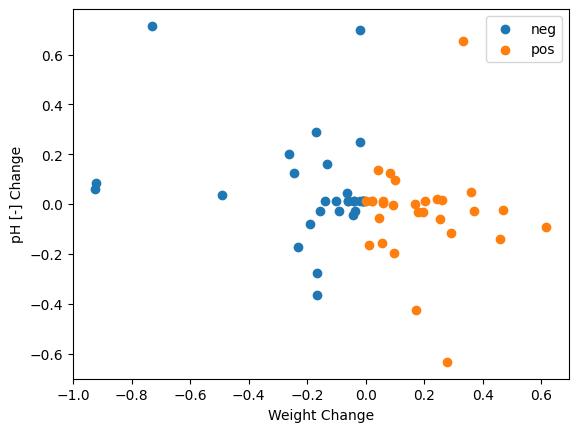

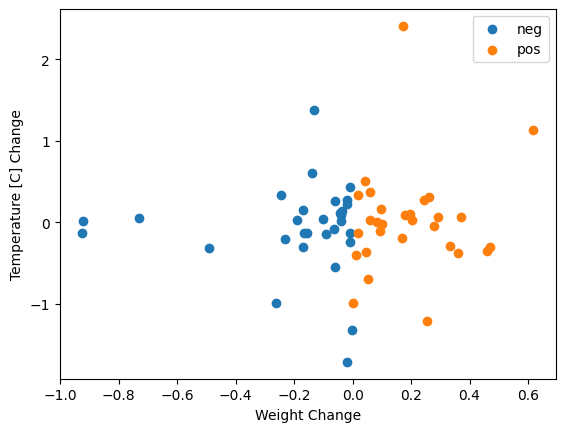

In [103]:
for col in import_feats:
    x = df_neg.loc[quarts_neg, 'Artemia weight [g/l]']
    y = df_neg.loc[quarts_neg, col]
    plt.scatter(x = x, y = y, label = 'neg')
    x = df_pos.loc[quarts_pos, 'Artemia weight [g/l]']
    y = df_pos.loc[quarts_pos, col]
    plt.scatter(x = x, y = y, label = 'pos')
    plt.xlabel('Weight Change')
    plt.ylabel(f'{col} Change')
    #plt.axhline(y=-0.4, color='r', linestyle='--')
    #plt.axhline(y=-2, color='r', linestyle='--')
    plt.legend()
    #plt.ylim([-2, 2])
    plt.savefig(f'feature_investigation/d_weight_d_{col[:2]}_square.png')
    plt.show()

In [ ]:
x = df_neg.loc[quarts, 'd_weight']
y = df_neg.loc[quarts, 'd_temp']
plt.scatter(x = x, y = y, label = 'neg')
x = df_pos.loc[quarts_pos, 'd_weight']
y = df_pos.loc[quarts_pos, 'd_temp']  
plt.scatter(x = x, y = y, label = 'pos')
plt.xlabel('d_weight')
plt.ylabel('d_temp')
plt.axhline(y=-0.4, color='r', linestyle='--')
plt.axhline(y=-2, color='r', linestyle='--')
plt.legend()
plt.ylim([-2, 2])
plt.savefig(f'feature_investigation/d_weight_d_temp_square.png')
plt.show()